In [1]:
import numpy as np
from scipy import misc
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
M = misc.imread('./train/2.png')

In [3]:
M2 = 255-M

In [4]:
M2.sum(axis = 1)

array([18951, 18862, 18838, 18877, 18907, 19025, 18809, 18848, 20139,
       24994, 26139, 25558, 25533, 29115, 48479, 47079, 46275, 47307,
       44304, 46600, 48395, 47052, 29230, 26644, 27425, 26809, 25927,
       26200, 26354, 26595, 26300, 26831, 30343, 30205, 29511, 28457,
       31232, 52060, 51754, 49647, 49363, 46410, 48253, 49809, 47494,
       24058, 21354, 22496, 20833, 18800, 18790, 18276, 18168, 17942,
       20315, 23918, 23609, 22264, 21693, 39498, 51305, 46945, 47502,
       43193, 42573, 45523, 48543, 34178, 19518, 21024, 21015, 18320,
       18078, 17908, 18068, 18006, 18376, 21224, 24204, 23577, 22869,
       21916, 36879, 47595, 44138, 45225, 43149, 42324, 44759, 46616,
       33029, 18000, 18922, 18879, 17121, 16715, 17075, 17104, 17043,
       16787, 19648, 22961, 22848, 22252, 21923, 37862, 48353, 44680,
       44887, 42210, 42421, 44650, 46403, 32120, 17433, 18932, 18952,
       17034, 16740, 16719, 16932, 16939, 17872, 21073, 23181, 22177,
       21967, 26416,

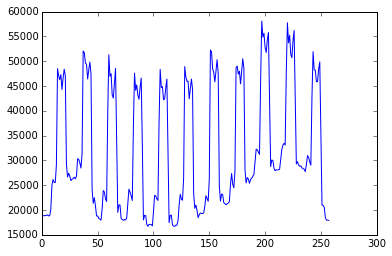

In [5]:
plt.plot(range(len(M2)), M2.sum(axis = 1))

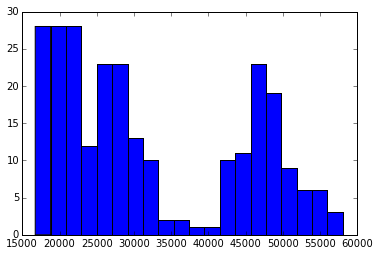

In [6]:
n, bins, freqs = plt.hist(M2.sum(axis = 1), bins = 20)

In [7]:
m = bins[list(n).index(min(n))]
str = False
lens = []
ar = M2.sum(axis = 1)
for i in xrange(len(ar)):
    if ar[i] < m and str:
        str = False
        lens.append(i)
    elif ar[i] > m and not str:
        str = True
        lens.append(i)

In [8]:
l = [lens[i+1] - lens[i] for i in xrange(0, len(lens), 2)]

In [9]:
winsz = np.round(np.mean(l))

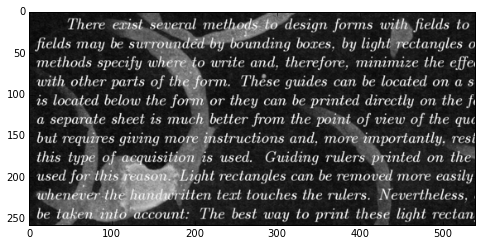

In [10]:
plt.figure(figsize = (8, 8))
plt.imshow(M2, cmap = 'Greys_r')

In [11]:
M2.shape

(258, 540)

In [12]:
winsz = int(winsz)
winds = []
for i in xrange(0, M2.shape[0]-winsz, winsz):
    for j in xrange(0, M2.shape[1]-winsz, winsz):
        winds.append(M2[i:i+winsz,j:j+winsz].copy())

In [13]:
winds[0]

array([[27, 27, 28, 27, 30, 32, 29, 24],
       [30, 25, 24, 20, 17, 24, 28, 21],
       [26, 21, 30, 32, 19, 20, 24, 20],
       [22, 21, 29, 30, 22, 17, 22, 26],
       [27, 28, 35, 35, 29, 27, 27, 26],
       [20, 19, 27, 30, 24, 22, 23, 21],
       [23, 23, 25, 22, 21, 21, 23, 25],
       [26, 24, 26, 23, 23, 19, 23, 24]], dtype=uint8)

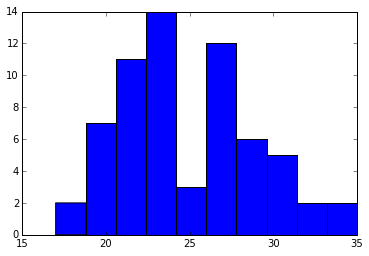

In [14]:
n, bins, freqs = plt.hist(winds[0].reshape(64))

In [15]:
from sklearn import cluster

In [16]:
cl = cluster.KMeans(n_clusters=2)

In [69]:
b = bins.reshape(len(bins), 1)
bz = np.array([b[0],b[-1]])
y = np.array([0, 1])

In [134]:
cl.fit_predict(bz, y = y)

array([0, 1], dtype=int32)

array([[[ 17.]],

       [[ 35.]]])

In [152]:
n, bins = np.histogram(winds[0].reshape(64))

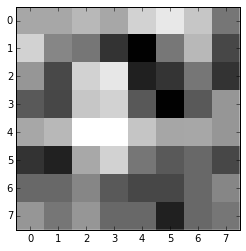

In [161]:
plt.imshow(winds[0], cmap = 'Greys_r', interpolation = 'none')

In [162]:
ans = []
for w in winds[0].reshape(64):
    c = cl.predict(w)[0]
    if c == 0:
        ans.append(0)
    else:
        ans.append(255)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:862: RuntimeWarning: Got data type uint8, converted to float to avoid overflows
  X = self._check_test_data(X)


In [164]:
ans = np.array(ans)

In [168]:
ans = ans.reshape(8,8)

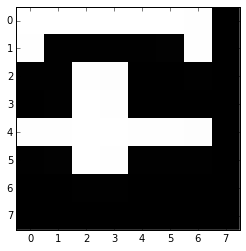

In [169]:
plt.imshow(ans, cmap = 'Greys_r', interpolation = 'none')

In [145]:
winsz = 8
winds = []
M3 = M2.copy()
for i in xrange(0, M2.shape[0]-winsz, winsz/2):
    for j in xrange(0, M2.shape[1]-winsz, winsz/2):
        window = M3[i:i+winsz,j:j+winsz].copy()
        cl = cluster.KMeans(n_clusters=2)
        n, bins = np.histogram(window.reshape(winsz*winsz))
        b = bins.reshape(len(bins), 1)
        x = cl.fit_predict(b)
        check = True
        if x[0] == 0:
            check = False
        ans = []
        for w in window.reshape(winsz*winsz):
            c = cl.predict(w)[0]
            if check:
                c = -c + 1
            if c == 0:
                ans.append(0)
            else:
                ans.append(255)
        ans = np.array(ans).reshape(winsz,winsz)
        M3[i:i+winsz,j:j+winsz] = ans
#winds.append(M2[i:i+winsz,j:j+winsz].copy())
#ans_winds = []
#for window in winds:
#    cl = cluster.KMeans(n_clusters=2)
#    n, bins = np.histogram(window.reshape(winsz*winsz))
#    b = bins.reshape(len(bins), 1)
#    cl.fit(b)
#    ans = []
#    for w in window.reshape(winsz*winsz):
#        c = cl.predict(w)[0]
#        if c == 0:
#            ans.append(0)
#        else:
#            ans.append(255)
#    ans = np.array(ans).reshape(winsz,winsz) 
#    ans_winds.append(ans)
#M3 = M2.copy()
#ind = 0
#for i in xrange(0, M3.shape[0]-winsz, winsz):
#    for j in xrange(0, M3.shape[1]-winsz, winsz):
#        M3[i:i+winsz,j:j+winsz] = ans_winds[ind]
#        ind += 1

In [172]:
ind = 0
for i in xrange(0, M3.shape[0]-winsz, winsz):
    for j in xrange(0, M3.shape[1]-winsz, winsz):
        M3[i:i+winsz,j:j+winsz] = ans_winds[ind]
        ind += 1

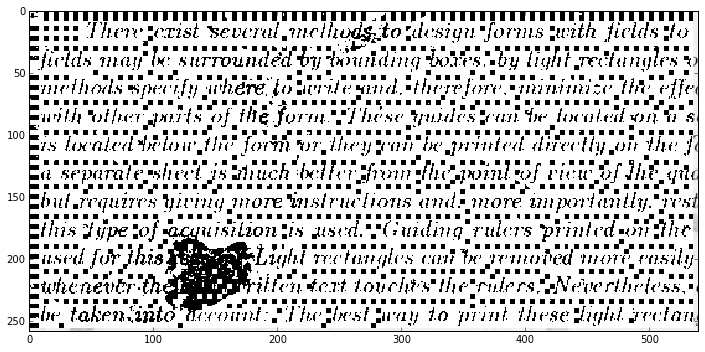

In [146]:
plt.figure(figsize = (12, 12))
plt.imshow(255-M3, cmap = 'Greys_r', interpolation = 'none')

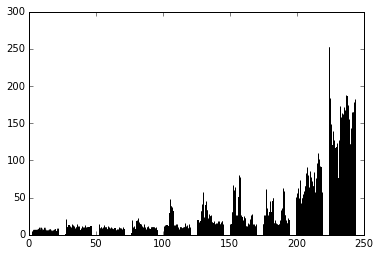

In [221]:
n, bins, f = plt.hist(M)

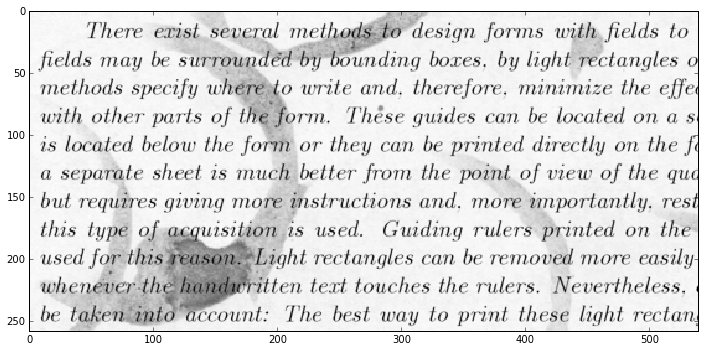

In [208]:
plt.figure(figsize = (12, 12))
plt.imshow(M, cmap = 'Greys_r', interpolation = 'none')

In [241]:
cl = cluster.KMeans(n_clusters=10)
b = bins.reshape(len(bins), 1)
cl.fit(b)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [245]:
Mx = M.copy()
Mx = Mx.reshape(Mx.size)
for i in xrange(len(Mx)):
    c = cl.predict(Mx[i])[0]
    if c == 0:
        Mx[i] = 0
    elif c == 1:
        Mx[i] = 0
    else:
        Mx[i] = 255

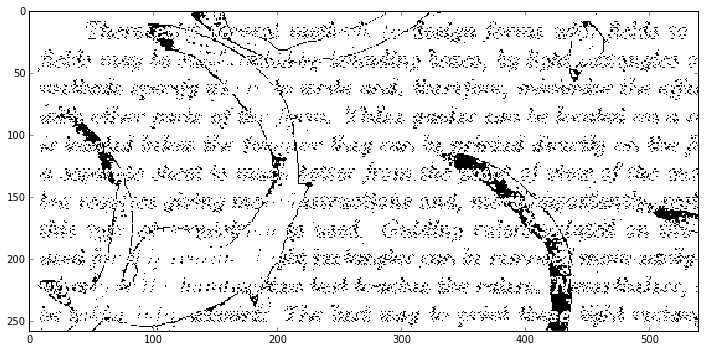

In [246]:
Mx = Mx.reshape(M2.shape[0], M2.shape[1])
plt.figure(figsize = (12, 12))
plt.imshow(Mx, cmap = 'Greys_r', interpolation = 'none')

In [239]:
eroded_square = ndimage.binary_erosion(Mx)
reconstruction = ndimage.binary_propagation(eroded_square, mask=Mx)

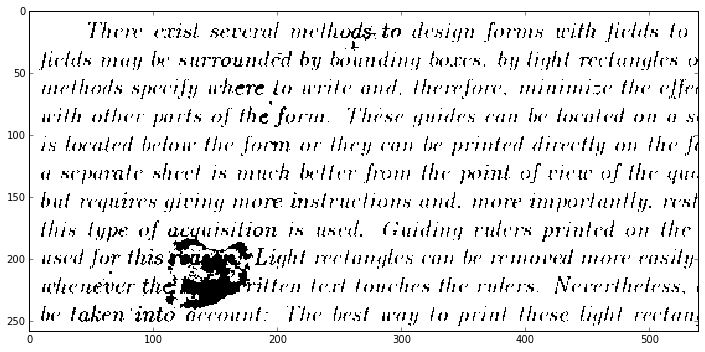

In [240]:
plt.figure(figsize = (12, 12))
plt.imshow(reconstruction, cmap = 'Greys_r', interpolation = 'none')